In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=== DIABETES DATA CLEANING ===")

# Load data from exploration phase
df = pd.read_csv('../data/raw/diabetes.csv')
print("Dataset loaded successfully!")
print(f"Original shape: {df.shape}")

=== DIABETES DATA CLEANING ===
Dataset loaded successfully!
Original shape: (768, 9)


In [2]:

print("=== CLEANING CONFIGURATION ===")
biological_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Biological features to clean:")
for feature in biological_features:
    zero_count = (df[feature] == 0).sum()
    print(f"  - {feature}: {zero_count} zeros")


=== CLEANING CONFIGURATION ===
Biological features to clean:
  - Glucose: 5 zeros
  - BloodPressure: 35 zeros
  - SkinThickness: 227 zeros
  - Insulin: 374 zeros
  - BMI: 11 zeros


In [3]:

print("=== STEP 1: REPLACE ZEROS WITH NaN ===")
df_clean = df.copy()

for feature in biological_features:
    original_zeros = (df_clean[feature] == 0).sum()
    df_clean[feature] = df_clean[feature].replace(0, np.nan)
    new_nulls = df_clean[feature].isnull().sum()
    print(f"{feature}: {original_zeros} zeros → {new_nulls} NaN values")

print("\nMissing values after zero replacement:")
print(df_clean.isnull().sum())

=== STEP 1: REPLACE ZEROS WITH NaN ===
Glucose: 5 zeros → 5 NaN values
BloodPressure: 35 zeros → 35 NaN values
SkinThickness: 227 zeros → 227 NaN values
Insulin: 374 zeros → 374 NaN values
BMI: 11 zeros → 11 NaN values

Missing values after zero replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [4]:

print("=== STEP 2: IMPUTE MISSING VALUES ===")
imputation_report = {}

for feature in biological_features:
    median_val = df_clean[feature].median()
    null_count_before = df_clean[feature].isnull().sum()
    
    df_clean[feature].fillna(median_val, inplace=True)
    
    null_count_after = df_clean[feature].isnull().sum()
    imputation_report[feature] = {
        'median_value': median_val,
        'nulls_before': null_count_before,
        'nulls_after': null_count_after
    }
    print(f"{feature}: Imputed {null_count_before} values with median {median_val:.2f}")

print("\nMissing values after imputation:")
print(df_clean.isnull().sum())


=== STEP 2: IMPUTE MISSING VALUES ===
Glucose: Imputed 5 values with median 117.00
BloodPressure: Imputed 35 values with median 72.00
SkinThickness: Imputed 227 values with median 29.00
Insulin: Imputed 374 values with median 125.00
BMI: Imputed 11 values with median 32.30

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_250912\3002461037.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[feature].fillna(median_val, inplace=True)


In [5]:

print("=== STEP 3: OUTLIER ANALYSIS ===")
def analyze_outliers(df, features):
    outlier_report = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outlier_report[feature] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'min_value': df[feature].min(),
            'max_value': df[feature].max()
        }
    return outlier_report

numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

outlier_report = analyze_outliers(df_clean, numerical_features)

print("Outlier Analysis (Post-Imputation):")
for feature, stats in outlier_report.items():
    print(f"{feature}: {stats['count']} outliers ({stats['percentage']:.2f}%)")


=== STEP 3: OUTLIER ANALYSIS ===
Outlier Analysis (Post-Imputation):
Pregnancies: 4 outliers (0.52%)
Glucose: 0 outliers (0.00%)
BloodPressure: 14 outliers (1.82%)
SkinThickness: 87 outliers (11.33%)
Insulin: 346 outliers (45.05%)
BMI: 8 outliers (1.04%)
DiabetesPedigreeFunction: 29 outliers (3.78%)
Age: 9 outliers (1.17%)


=== CLEANING IMPACT VISUALIZATION ===


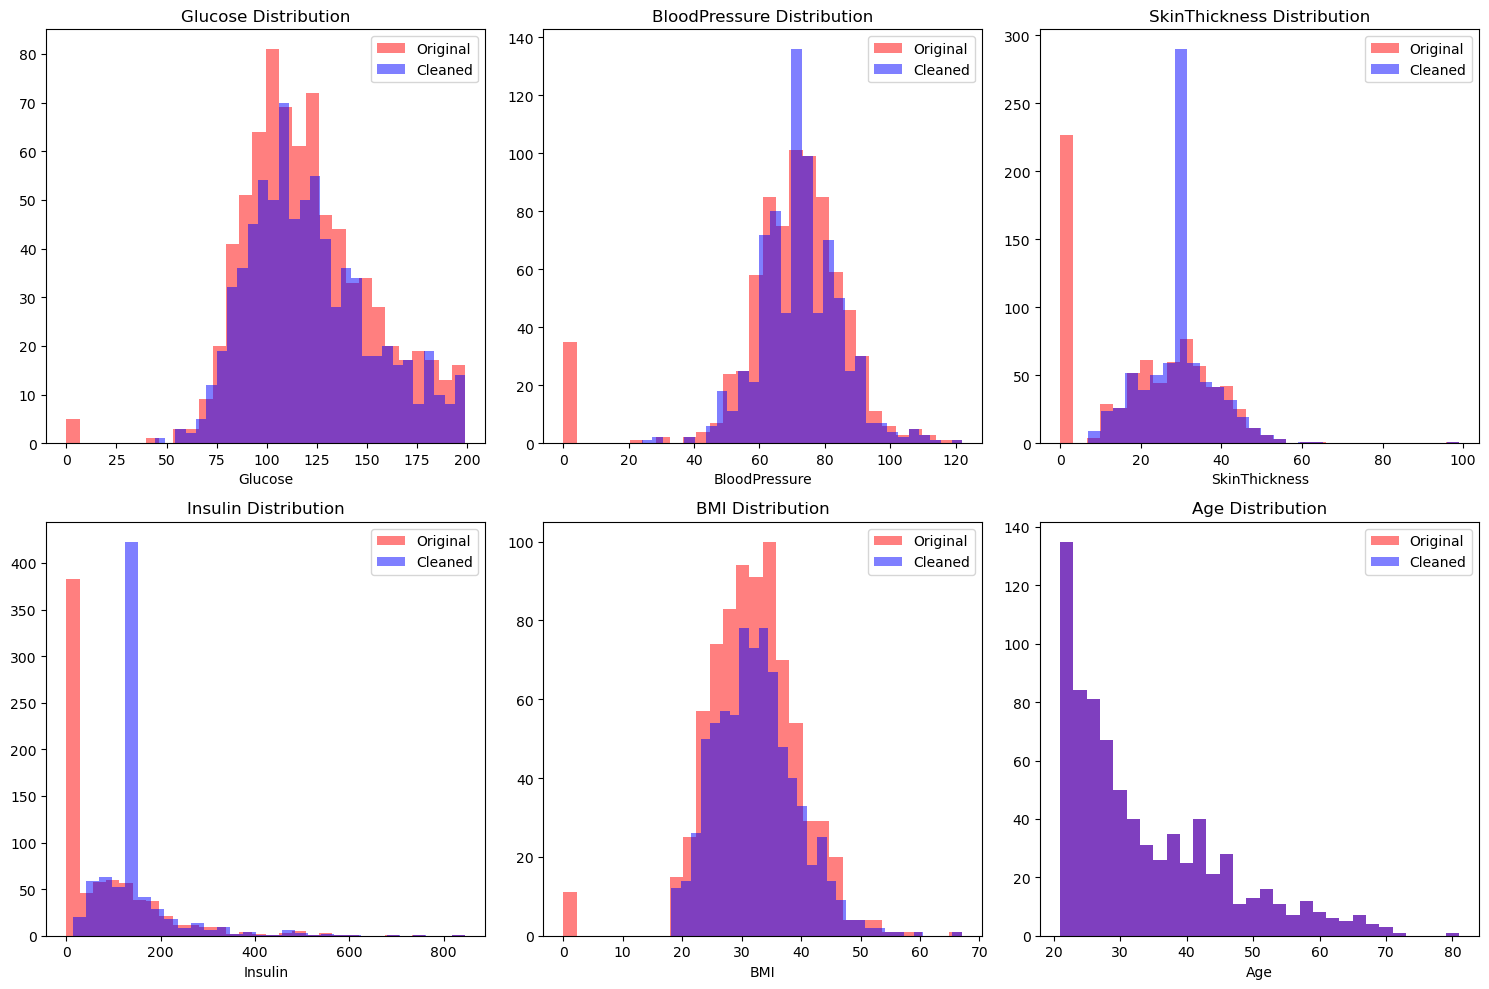

In [6]:

print("=== CLEANING IMPACT VISUALIZATION ===")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    if i < len(axes):
        # Before cleaning
        axes[i].hist(df[feature], bins=30, alpha=0.5, label='Original', color='red')
        # After cleaning
        axes[i].hist(df_clean[feature], bins=30, alpha=0.5, label='Cleaned', color='blue')
        axes[i].set_title(f'{feature} Distribution')
        axes[i].set_xlabel(feature)
        axes[i].legend()

plt.tight_layout()
plt.show()

In [7]:


# Cell 7: Data validation
print("=== DATA VALIDATION ===")
print("Range validation after cleaning:")
validation_report = {}

for feature in biological_features:
    min_val = df_clean[feature].min()
    max_val = df_clean[feature].max()
    zeros_remaining = (df_clean[feature] == 0).sum()
    
    validation_report[feature] = {
        'min': min_val,
        'max': max_val,
        'zeros_remaining': zeros_remaining,
        'valid_range': min_val > 0  # All biological features should be > 0
    }
    
    status = "✓ VALID" if min_val > 0 else "✗ INVALID"
    print(f"{feature}: {status} (range: {min_val:.2f} - {max_val:.2f}, zeros: {zeros_remaining})")


=== DATA VALIDATION ===
Range validation after cleaning:
Glucose: ✓ VALID (range: 44.00 - 199.00, zeros: 0)
BloodPressure: ✓ VALID (range: 24.00 - 122.00, zeros: 0)
SkinThickness: ✓ VALID (range: 7.00 - 99.00, zeros: 0)
Insulin: ✓ VALID (range: 14.00 - 846.00, zeros: 0)
BMI: ✓ VALID (range: 18.20 - 67.10, zeros: 0)


In [8]:

print("=== SAVE CLEANED DATA ===")
import os

# Create directory if it doesn't exist
os.makedirs('../data/interim', exist_ok=True)

# Save cleaned dataset
cleaned_path = '../data/interim/diabetes_cleaned.csv'
df_clean.to_csv(cleaned_path, index=False)
print(f"✓ Cleaned data saved to: {cleaned_path}")


=== SAVE CLEANED DATA ===
✓ Cleaned data saved to: ../data/interim/diabetes_cleaned.csv


In [9]:

print("=== CLEANING SUMMARY ===")
print("🔧 DATA CLEANING OPERATIONS COMPLETED")
print("=" * 50)

total_zeros_handled = sum([stats['nulls_before'] for stats in imputation_report.values()])
print(f"Total zero values handled: {total_zeros_handled}")

print("\n📊 IMPUTATION REPORT:")
for feature, stats in imputation_report.items():
    print(f"  - {feature}: {stats['nulls_before']} values → median {stats['median_value']:.2f}")

print("\n📈 DATA QUALITY IMPROVEMENT:")
print("  - Biological impossibilities: RESOLVED")
print("  - Missing values: ELIMINATED") 
print("  - Data ranges: VALIDATED")
print("  - Outliers: DOCUMENTED")

print(f"\n📁 OUTPUT: {cleaned_path}")
print(f"Dataset shape: {df_clean.shape}")

print("\n✅ CLEANING PHASE COMPLETED")
print("Next: Run 03_feature_engineering.ipynb")

=== CLEANING SUMMARY ===
🔧 DATA CLEANING OPERATIONS COMPLETED
Total zero values handled: 652

📊 IMPUTATION REPORT:
  - Glucose: 5 values → median 117.00
  - BloodPressure: 35 values → median 72.00
  - SkinThickness: 227 values → median 29.00
  - Insulin: 374 values → median 125.00
  - BMI: 11 values → median 32.30

📈 DATA QUALITY IMPROVEMENT:
  - Biological impossibilities: RESOLVED
  - Missing values: ELIMINATED
  - Data ranges: VALIDATED
  - Outliers: DOCUMENTED

📁 OUTPUT: ../data/interim/diabetes_cleaned.csv
Dataset shape: (768, 9)

✅ CLEANING PHASE COMPLETED
Next: Run 03_feature_engineering.ipynb
